# **Monte Carlo Method's Classification Problem? or Predicting the Value of π?**





In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

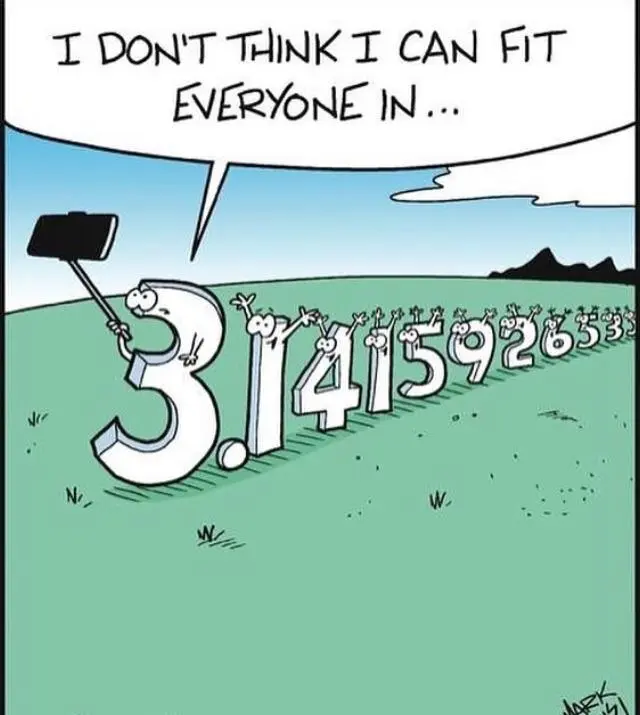

## **Background**

Classification is well known problem in statistics and data scicence. <br>
Moreover it's related to many fields like: medicine, finances, ecology, artificial intelligence and etc.

But, is classification related to methods of estimation? Maybe! <br>
Think about that. In the meantime, let me tell about Monte Carlo.

Monte Carlo is officially an administrative area of Monaco.
This place is especially known becuause of the casino located in it. <br> Because of that casino, a broad series of computational algorithms was named after the aforementioned area. These algorithms are known as the Monte Carlo methods (or simulations).

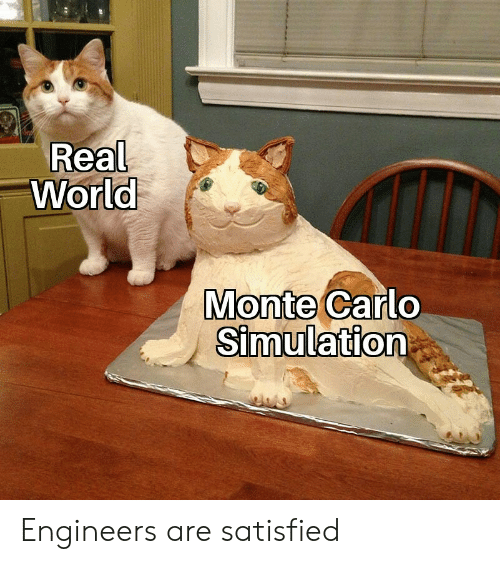

## **Monte Carlo method for π estimation**

The Monte Carlo method solve computational problems using randomness, even though there might be a deterministic approach for the solutions.

A famous use of the Monte Carlo method is for estimating π. <br>
The concept is very simple. 
Let's assume that we have a circle inscribed in square. Refer to the image below:

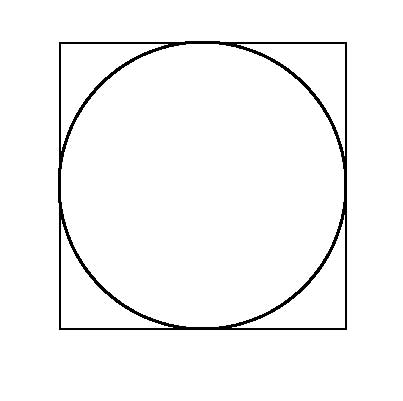

Denote $r$ as the radius of the circle.
Using some knowledge of geometry, we can deduce these insights: the diameter of the circle equals to $2r$ and the edge of the square equals to $2r$, as well. 
Denote $A_{circle}$ as the area of the circle and $A_{square}$ as the area of the square. Therefore:

$$A_{circle} = \pi r^2, \thinspace A_{square} = 4r^2$$

Meaning:
$$\frac{A_{circle}}{A_{square}} = \frac{\pi}{4} \iff \pi = 4 \cdot \frac{A_{circle}}{A_{square}}$$

In order to estimate π, let's assume that the circle and the square are located in a Cartesian coordinate system. For sake of simplicity, let's also assume that the circle is a unit circle. Meaning the $r = 1$. Therefore, our circle's equation is:
$$x^2 + y^2 = 1$$
In addition, our square's vetrices are: 
$(1,1), (1,-1), (-1,1), (-1,-1)$.

The Monte Carlo methods sample random numbers many times and use them in calculations in order to get numerical results. <br>
In our case, we need to sample many random numbers between $-1$ and $1$ for the `x` and `y` coordinates. Therefore we generate random points within our square.

$A_{square}$ can be represented by the total number of generated points. <br>
$A_{circle}$ can be represented by the number of generated points **within the circle**. <br>
Therefore π can be estimated as follows:

$$\pi \approx 4 \cdot \frac{\mathrm{The \ number \ of \ generated \ points \ within \ the \ circle}}{\mathrm{The \ total \ number \ of \ generated \ points}}$$



### Classification within the estimation?

As we can see, the estimation includes a dichotomous componet, whether a single generared point is in the circle or not? 

This raises the following questions: 

1.   Can classification add insights to the π estimation?
2.   Which classifiers are suitable to this kind of problem?

I will answer each question later in this article.

## **Initial estimation**

At first, we need data. <br>
In addition, it will be nice to see the estimation of the Monte Carlo method in action. 

In [ ]:
# Useful Modules
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

# Modules for the classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm

I sampled 625,000 random numbers for each of the two coordinates. <br>
Denote a single generated point $(x_i,y_i)$. All the coordinates come from a uniform distritibution. Meaning:
$$x_i \sim U([0,1]) \quad \forall \ \ 1\le i \le 625,000$$
$$y_i \sim U([0,1]) \quad \forall \ \ 1\le i \le 625,000$$

The uniform distibuted numbers statisfied the condition that the coordinates must be between $-1$ and $1$.

In [ ]:
# Sampling the data
np.random.seed(1134)
x = np.random.uniform(-1, 1, size = 62500)
y = np.random.uniform(-1, 1, size = 62500)

$(x_i,y_i)$ is considered within the circle if the following condition is satisfied:
$$ x^2_i + y^2_i \le 1 $$

The following graph shows the estimation of π using Monte Carlo method:

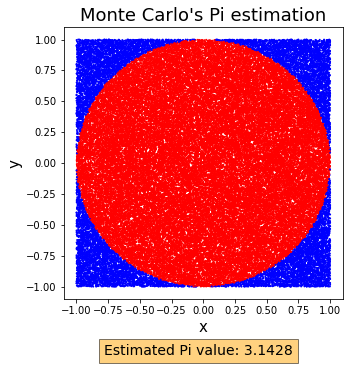

In [ ]:
pi_estimated = round(4*sum(x**2 + y**2 <= 1) / 62500, 4)
plt.figure(figsize=(5,5))
plt.scatter(x, y, s=1, c = np.where(x**2 + y**2 <= 1, "red", "blue"))
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.title("Monte Carlo's Pi estimation", size = 18)
plt.figtext(0.5, -0.03, "Estimated Pi value: {}".format(pi_estimated), 
            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.show()

As you can see, the estimation yields nice results. <br>
Firstly, we got a nice red circle. <br>
Secondly, the estimated value of π is $3.1428$. <br> 
Considering that real value is approximately $3.1416$, we can conclude that the estimation is quite accurate.

## **Data preparation**

So what data do we have? 

Our response variable is an indicator of the points "location", as $1$ represents a point in the circle and $0$ represents a point out of it. Our explanatory variables (or features) are the $X$ and $Y$ coordinates.

In addition, I split the data to training set and testing set. The training set consists of $80\%$ of the observartions for accuracy sake. <br>
Even though it seems that it is a good idea to scale the data, still it doesn't make any sense. It is worth noting that data consist of points from a rectangular coordinate system. If we scale the dataset, it might lose its meaning. 

In [ ]:
ybin = np.where(x**2 + y**2 <= 1, 1, 0) # Binary target variable
data = pd.DataFrame([x, y], index=["x", "y"]).T # The features

# Train-test split
data_train, data_test, target_train, target_test = train_test_split(data, ybin, train_size=0.8, random_state=1343)

## **Fitting some models**

After we got our data, we can finally fit some models. <br>
It's worth noting that our classification problem is non-linear. That's because the response variable doesn't have a "linear relation" with the features (see "Initial estimation" section). <br>
Therefore models like logistic regression, are out of the picture.

I chose 3 classification models that I thought they fit:

1. Support Vector Machine (SVM) model with a RBF kernel (the defualt option in python): I chose it because it deals with non-linear data nicely.

2. K-Nearest Neighbors (KNN) model with 3 neighbors (3-NN): I chose it because it's been used also in clustering analysis (maybe it will distinguish well between the points in circle and out of it).

3. Support Vector Machine (SVM) model with a sigmoid kernel: I chose it because "sigmoid" is non-linear kernel.

Of course, I fitted the model using the training set.

<u>Note:</u> I chose 3 neighbors because I assumed that it's the optimal number of neighbors for our classification problem.

In [ ]:
svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(data_train, target_train)

SVC()

In [ ]:
sigmoid_svm = svm.SVC(kernel='sigmoid')
sigmoid_svm.fit(data_train, target_train)

SVC(kernel='sigmoid')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, target_train)

KNeighborsClassifier(n_neighbors=3)

## **Models' evaluatuion**

### Classification measurements

In order to evaluate the classification fo the models, I use these measurements:
1. Accuarcy
2. Recall
3. Precision

The results of each model are displayed below for training and testing sets each:

In [ ]:
def classification_eval(real, predicted):
  tr_acc = round(metrics.accuracy_score(real[0], predicted[0]), 4)
  te_acc = round(metrics.accuracy_score(real[1], predicted[1]), 4) 
  tr_rec = round(metrics.recall_score(real[0], predicted[0]), 4) 
  te_rec = round(metrics.recall_score(real[1], predicted[1]), 4) 
  tr_pre = round(metrics.precision_score(real[0], predicted[0]), 4) 
  te_pre = round(metrics.precision_score(real[1], predicted[1]), 4) 
  dat = [[tr_acc, te_acc], [tr_rec, te_rec], [tr_pre, te_pre]]
  return pd.DataFrame(dat, index=['Accuracy', 'Recall', 'Precision'],
                      columns=['Train', "Test"])

In [ ]:
knn_tr_pred = knn.predict(data_train)
knn_te_pred = knn.predict(data_test)

In [ ]:
svm1_tr_pred = svm_clf.predict(data_train)
svm1_te_pred = svm_clf.predict(data_test)

In [ ]:
svm2_tr_pred = sigmoid_svm.predict(data_train)
svm2_te_pred = sigmoid_svm.predict(data_test)

#### <u>KNN</u>

In [ ]:
classification_eval([target_train, target_test], [knn_tr_pred, knn_te_pred])

,Train,Test
Accuracy,0.9981,0.9954
Recall,0.9990,0.9969
Precision,0.9986,0.9972


#### <u>SVM - RBF kernel</u>

In [ ]:
classification_eval([target_train, target_test], [svm1_tr_pred, svm1_te_pred])

,Train,Test
Accuracy,0.9927,0.9930
Recall,0.9983,0.9981
Precision,0.9924,0.9930


#### <u>SVM - Sigmoid kernel</u>

In [ ]:
classification_eval([target_train, target_test], [svm2_tr_pred, svm2_te_pred])

,Train,Test
Accuracy,0.7331,0.7350
Recall,0.8304,0.8350
Precision,0.8301,0.8286


We can see that the KNN and the "RBF" SVM models are very accurate: all the measurements are around $0.99$!!!  
In addition, the "sigmoid" SVM classified the data in the worst way among all the models: its measurements are between $0.73$ to $0.83$. 

However, we can see imporvements in the test measurements of the SVM models. So, I don't reject any of the models yet. 

### Visual evaluation

Because we have a special case of classification, we have other ways to evaluate the models' performance. Remember, we plotted the original data and got a red circle inside a blue square. The only thing that chould have changed is whether some points are in the circle or not.

Therefore, let's plot the classification of each model for the training and testing sets (separately):

In [ ]:
def visual_predictions(data, predictions_lst, test=False):
  fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(12, 4))
  size = 1
  title_type = "training data"
  models = ['SVM with a RBF kernel', 'KNN with 3 neighbors (3-NN)', 'SVM with a Sigmoid kernel']
  if test:
    title_type = "testing data"
    size = 2
  for i in range(3):
    coloring = np.where(predictions_lst[i] == 1, 'r', 'b')
    axs[i].scatter(data['x'], data['y'], c = coloring, s = size)
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    axs[i].set_title(models[i])
  plt.suptitle("Classification for " + title_type, y=1.05, size=20)
  fig.show()



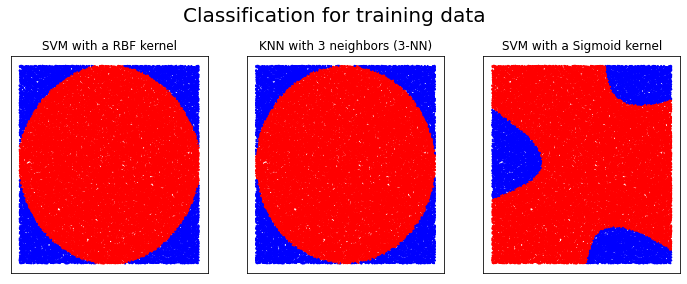

In [ ]:
visual_predictions(data_train, [svm1_tr_pred, knn_tr_pred, svm2_tr_pred])

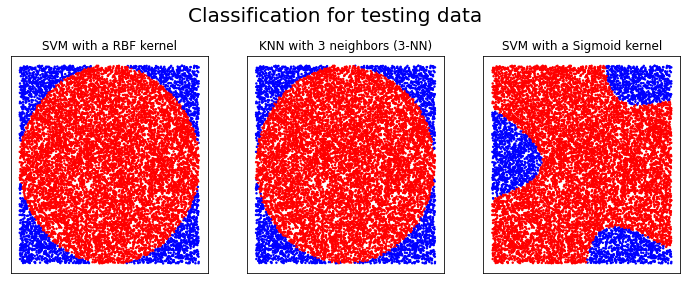

In [ ]:
visual_predictions(data_test, [svm1_te_pred, knn_te_pred, svm2_te_pred], True)

As you can see, both KNN and "RBF" SVM models provided nice red circle for both datasets. However the "Sigmoid" SVM model didn't provide provide a circle. That explains its bad performance regarding the classification measurements. <br>
Therefore I reject the latter.

### Evaluation of the π estimation

After the most accurate models remain, we will examine the estimation of π of the predictions. The following table shows the estimations of π for both models and both datasets: 

In [ ]:
# Estimating Pi
pi_est_tr = [4*knn_tr_pred.sum() / len(target_train), 4*svm1_tr_pred.sum() / len(target_train)]
pi_est_te = [4*knn_te_pred.sum() / len(target_test), 4*svm1_te_pred.sum() / len(target_test)]
pd.DataFrame([pi_est_tr, pi_est_te], index=['Train', 'Test'], columns=['KNN', 'SVM']).round(4)

,KNN,SVM
Train,3.1453,3.1626
Test,3.1373,3.1542


As you see the KNN model provided the most accurate estimation of π for both datasets.

### Error evaluations

Let's evaluate the errors of the models.
There are two types of errors: False Positive and False Negative. We will examine both of them. <br>
<u>Note:</u> we will focus on the test prediction only in order to avoid overfitting.<br>
At first, we take a look on the models' confusion matrices. 

#### Confusion matrices

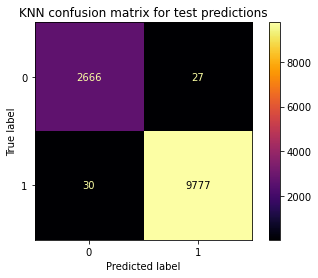

In [ ]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(target_test, knn_te_pred)).plot(cmap='inferno')
plt.title('KNN confusion matrix for test predictions')
plt.show()

As you can see, the KNN model has more false negatives than false positives. Meaning the model might underestimate the response variable. 

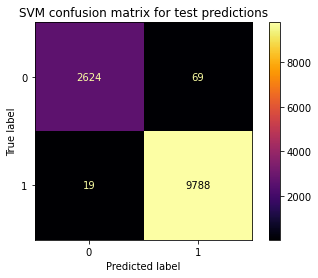

In [ ]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(target_test, svm1_te_pred)).plot(cmap='inferno')
plt.title('SVM confusion matrix for test predictions')
plt.show()

As you can see, the SVM model has more false positives than false negatives. Meaning the model might overestimate the response variable. <br> 
However, the difference between the two errors is greater in this model than the previous model. Meaning the SVM might overestimate more often than the KNN model underestimates. 

#### Errors characterization

Now we will take a deeper look on the two types of errors.
We will try to characterize them. 

In [ ]:
test_df = pd.DataFrame([target_test, knn_te_pred, svm1_te_pred], index=['real', 'knn_predicted', 'svm_predicted']).T
knn_fp_lst = test_df.loc[test_df.real == 0].loc[test_df.knn_predicted == 1].index.tolist()
knn_fn_lst = test_df.loc[test_df.real == 1].loc[test_df.knn_predicted == 0].index.tolist()
svm_fp_lst = test_df.loc[test_df.real == 0].loc[test_df.svm_predicted == 1].index.tolist()
svm_fn_lst = test_df.loc[test_df.real == 1].loc[test_df.svm_predicted == 0].index.tolist()

Firstly, I filtered outlier points for each error type and model combination. Secondly I sampled 5 observations for each combination.

The following tables display the error types for each model (Note that "circle value" is $x^2_i + y^2_i$):

In [ ]:
np.random.seed(3)
knn_chosen_fp = np.random.choice(knn_fp_lst, 5, False)
knn_chosen_fn = np.random.choice(knn_fn_lst, 5, False)
svm_chosen_fp = np.random.choice(svm_fp_lst, 5, False)
svm_chosen_fn = np.random.choice(svm_fn_lst, 5, False)

<u>KNN's False Positives:</u>

In [ ]:
testing = data_test.copy()
testing['circle value'] = testing.apply(lambda row: row.x**2 + row.y**2, axis=1)
testing.iloc[knn_chosen_fp].round(4)

,x,y,circle value
46979,-0.9990,-0.1329,1.0157
49396,0.7560,0.6595,1.0065
33030,-0.5381,-0.8431,1.0004
51428,0.8239,0.5676,1.0009
57119,-0.1236,0.9985,1.0124


<u>KNN's False Negatives:</u>

In [ ]:
testing.iloc[knn_chosen_fn].round(4)

,x,y,circle value
3141,0.1959,-0.9789,0.9967
30958,-0.8026,0.5910,0.9935
32826,-0.0863,-0.9959,0.9993
34244,0.9564,-0.2911,0.9995
36943,-0.9469,-0.2966,0.9847


<u>SVM's False Positives:</u>

In [ ]:
testing.iloc[svm_chosen_fp].round(4)

,x,y,circle value
43438,-0.2238,0.9751,1.0010
39141,-0.2586,0.9714,1.0105
50129,0.9963,-0.1706,1.0217
21279,-0.3691,-0.9301,1.0013
51589,-0.2236,0.9781,1.0067


<u>SVM's False Negatives:</u>

In [ ]:
testing.iloc[svm_chosen_fn].round(4)

,x,y,circle value
15257,-0.8211,0.5703,0.9995
13175,-0.7638,-0.6410,0.9943
59785,0.7138,0.6985,0.9975
57157,-0.5117,-0.8585,0.9988
60369,-0.5223,0.8488,0.9933


Both models produced similar false negatives and false positives.
The false positives are around $0.99$ circle value and the false negatives are around $1.001$ circle value.

Let's examine the shared errors among the models (I didn't sample them because there are few of them):

In [ ]:
both_fp_index = test_df.loc[test_df.real == 0].loc[test_df.knn_predicted == 1].loc[test_df.svm_predicted == 1].index
both_fn_index = test_df.loc[test_df.real == 1].loc[test_df.knn_predicted == 0].loc[test_df.svm_predicted == 0].index

<u>Shared False Positives:</u>

In [ ]:
testing.iloc[both_fp_index].round(4)

,x,y,circle value
16032,0.9994,0.0856,1.0062
32856,-0.1390,0.9992,1.0178
9311,0.9134,0.4162,1.0074
41324,0.5002,-0.8689,1.0053
19247,-0.1246,0.9972,1.0099
35741,0.9172,0.4092,1.0086
11682,-0.9690,0.2547,1.0039
57119,-0.1236,0.9985,1.0124
57567,0.5693,-0.8234,1.0020
46979,-0.9990,-0.1329,1.0157


<u>Shared False Negatives:</u>

In [ ]:
testing.iloc[both_fn_index].round(4)

,x,y,circle value
15257,-0.8211,0.5703,0.9995
22272,0.6412,0.7666,0.9989
456,-0.6120,0.7884,0.9961
23366,0.6429,0.7627,0.9951
33174,-0.7750,0.6306,0.9984


There is no new insight from the shared errors.

#### Error distributions

As a final examination, we will take a look on the distributions of the error types for each model:

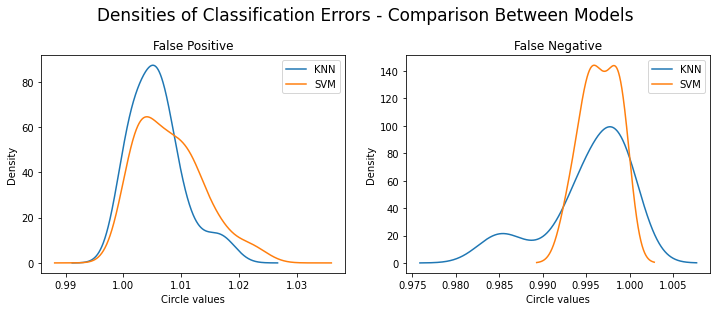

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
testing.iloc[knn_fp_lst]['circle value'].plot(kind="density", ax = axes[0])
testing.iloc[svm_fp_lst]['circle value'].plot(kind="density", ax = axes[0])
axes[0].legend(["KNN", "SVM"])
axes[0].set_title('False Positive')
axes[0].set_xlabel('Circle values')
testing.iloc[knn_fn_lst]['circle value'].plot(kind="density", ax = axes[1])
testing.iloc[svm_fn_lst]['circle value'].plot(kind="density", ax = axes[1])
axes[1].legend(["KNN", "SVM"])
axes[1].set_title('False Negative')
axes[1].set_xlabel('Circle values')
plt.suptitle('Densities of Classification Errors - Comparison Between Models', size=17, y=1.05)
fig.show()

As you can see, the distributions of false positive is concentrated between $1.00$ and $1.01$ while the SVM distiribution is wider. In addition, the distributions of false negative is concentrated between $0.99$ and $1.00$ while the KNN distiribution is wider.

These insight confirm our discoveries from the confusion tables.

## **Conclusions and discussion**

In this article, I tried to apply non-linear prediction models for the Monte Carlo method of π estimation. One model was rejected because of its bad prediction and I evaluated the other models in many ways.

The prediction didn't offer any insight on the estimation clearly, but we can deduce which model is ideal for estimation if we don't have all the data.

Regarding the prediction, KNN and "RBF" SVM models are ideal in this case. <br>
Regarding the estimation, KNN with 3 neighbors (3-NN) is ideal in this case. <br>
I would recommend examining KNN with more neighbors for further researches.
If there are more features in similar cases, I would recommend examining if the Random Forest model is viable.

Once again, classification proved that it is one of the intriguing fields in statistics and data science.
